In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from sklearn import preprocessing
from scipy import stats
from itertools import combinations

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../../data/clf-ts-acc-ova.json/'))))

154700it [00:00, 380068.39it/s]


In [4]:
df.head(10)

,acc,domain,window
0,0.630847,foxnews.com,83
1,0.638432,dailycaller.com,9
2,0.653603,foxnews.com,43
3,0.687737,wsj.com,54
4,0.780025,buzzfeed.com,68
5,0.710493,breitbart.com,54
6,0.738306,rt.com,47
7,0.729456,bloomberg.com,64
8,0.735777,sputniknews.com,47
9,0.640961,dailycaller.com,68


foxnews.com
LinregressResult(slope=0.0005066095204220417, intercept=0.6082914699392498, rvalue=0.6024311126576416, pvalue=0.0, stderr=7.037021326650503e-06)


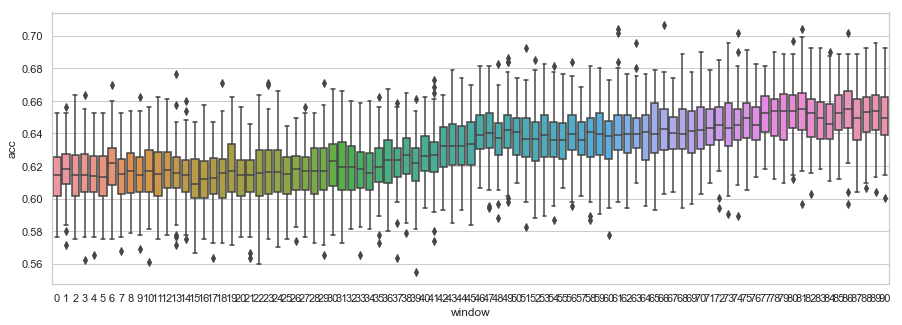

dailycaller.com
LinregressResult(slope=0.000241471535083612, intercept=0.622597472613545, rvalue=0.32696437388115873, pvalue=1.0950920870581432e-225, stderr=7.3171372399418395e-06)


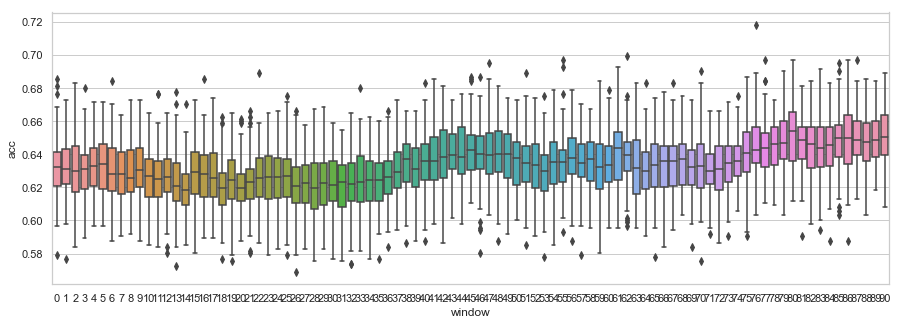

wsj.com
LinregressResult(slope=0.0002069867928332538, intercept=0.6686689500225036, rvalue=0.29791590336574675, pvalue=6.770559273257368e-186, stderr=6.953345776424445e-06)


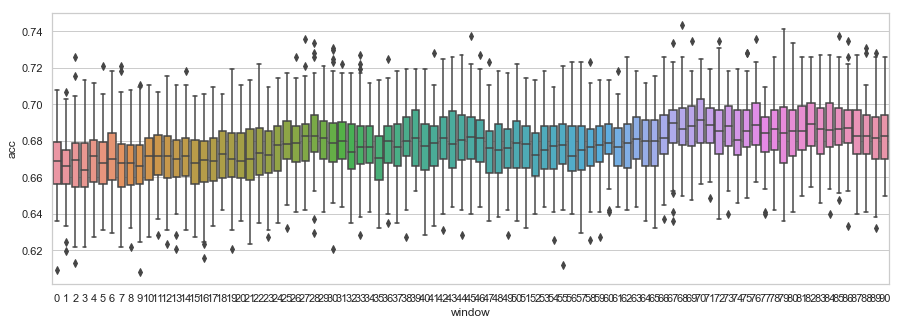

buzzfeed.com
LinregressResult(slope=0.0004332252383134255, intercept=0.7765377044352365, rvalue=0.541430820139915, pvalue=0.0, stderr=7.0528112269092826e-06)


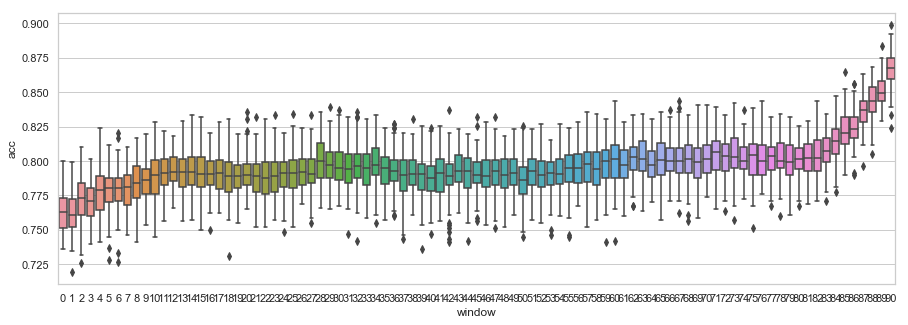

breitbart.com
LinregressResult(slope=3.0381623909858276e-05, intercept=0.6656716279284519, rvalue=0.04380598502077582, pvalue=2.911796058557678e-05, stderr=7.264194578337413e-06)


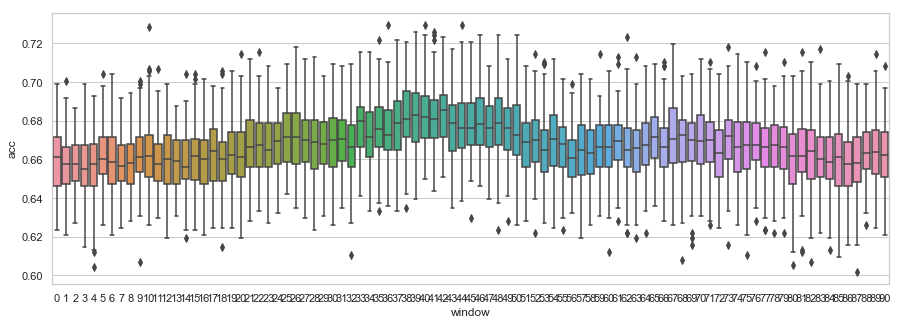

rt.com
LinregressResult(slope=7.586753019589044e-06, intercept=0.7339961294877447, rvalue=0.012045079284910672, pvalue=0.25059261442747777, stderr=6.603007796549267e-06)


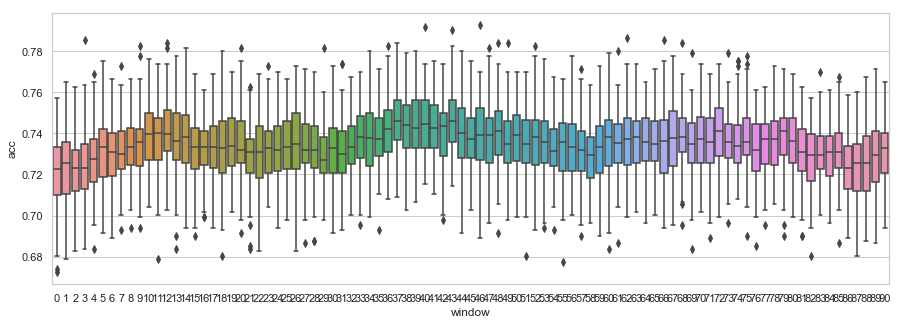

bloomberg.com
LinregressResult(slope=-5.3182108201942984e-05, intercept=0.7298653060097468, rvalue=-0.08387994723440038, pvalue=1.104381072719321e-15, stderr=6.623708628158489e-06)


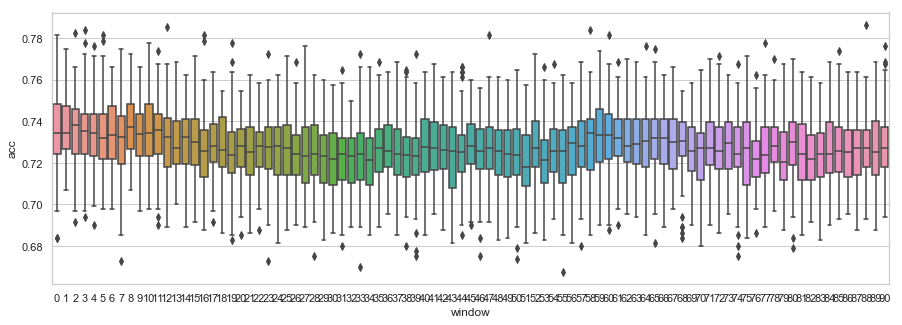

sputniknews.com
LinregressResult(slope=5.716342724319156e-05, intercept=0.7570351796740563, rvalue=0.08258536001972203, pvalue=3.008816647102003e-15, stderr=7.2319619833074054e-06)


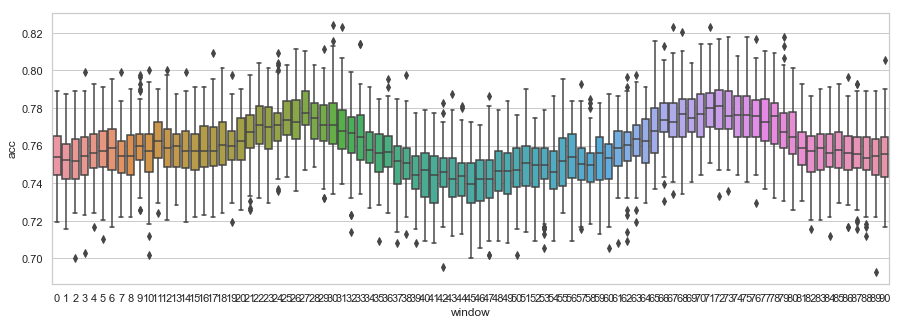

nytimes.com
LinregressResult(slope=-4.756649122630991e-05, intercept=0.6382707209832059, rvalue=-0.07064282202554889, pvalue=1.5155929836571243e-11, stderr=7.041638795533047e-06)


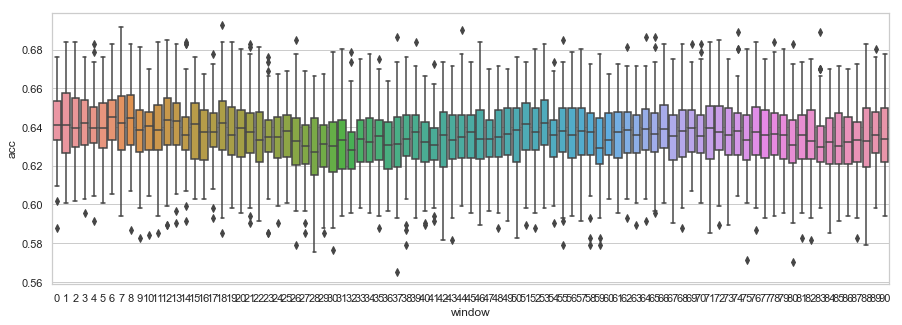

dailykos.com
LinregressResult(slope=-0.0004172381398869247, intercept=0.7206594077059005, rvalue=-0.5161605208784537, pvalue=0.0, stderr=7.258543657389893e-06)


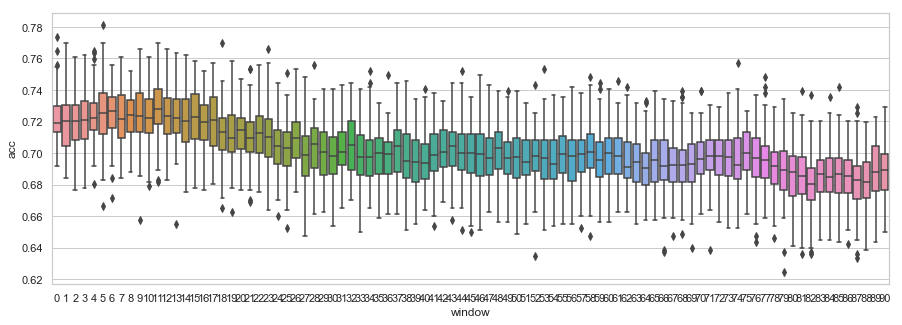

apnews.com
LinregressResult(slope=5.7085707200191115e-05, intercept=0.6840328848935737, rvalue=0.0869569450789098, pvalue=9.588945149404529e-17, stderr=6.856491548155971e-06)


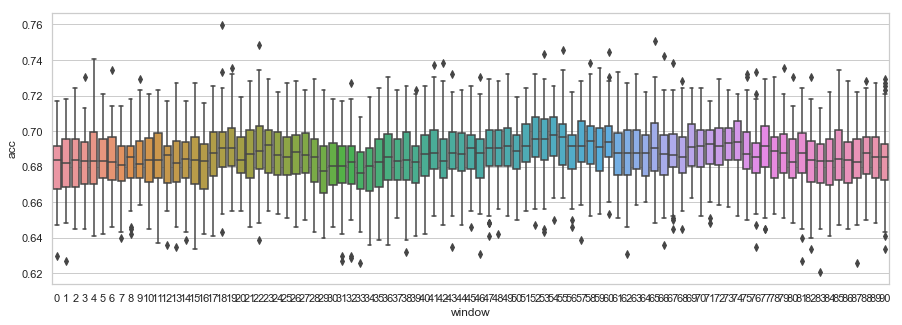

washingtonpost.com
LinregressResult(slope=4.490414724478419e-05, intercept=0.6185886411300288, rvalue=0.05988411669248448, pvalue=1.0846787884216834e-08, stderr=7.847326566099882e-06)


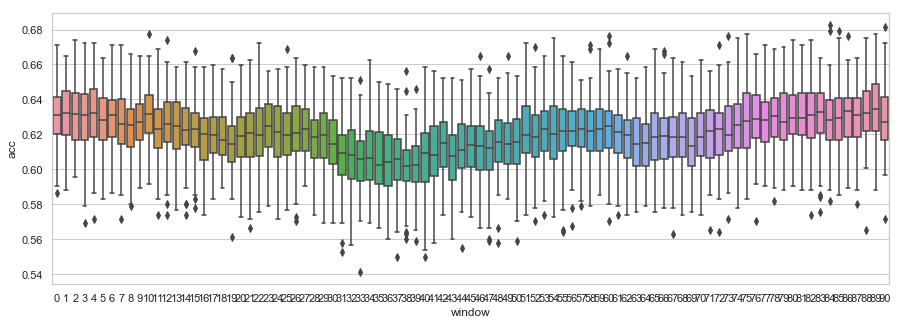

msnbc.com
LinregressResult(slope=-5.772497309921961e-05, intercept=0.7410319325685859, rvalue=-0.0792312298693058, pvalue=3.759920917269582e-14, stderr=7.61424624991444e-06)


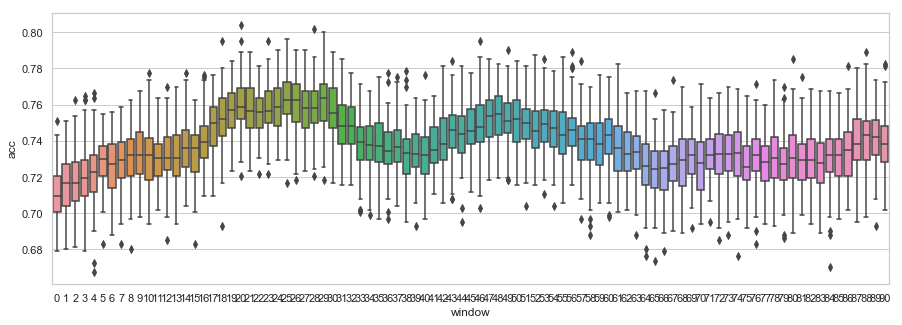

huffingtonpost.com
LinregressResult(slope=-0.0004908901965392578, intercept=0.6632116045695413, rvalue=-0.5863293502994874, pvalue=0.0, stderr=7.110396059572248e-06)


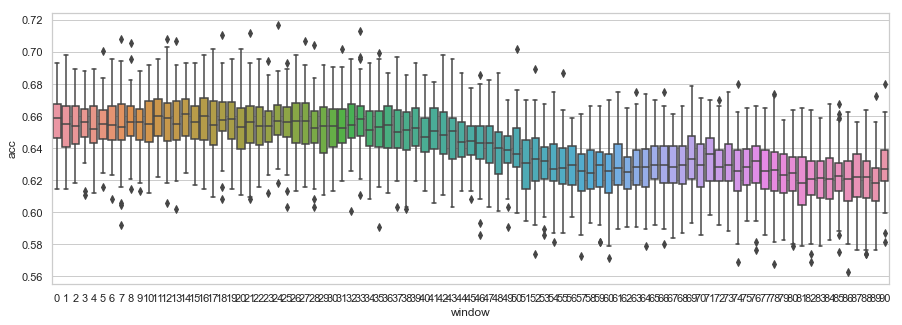

thehill.com
LinregressResult(slope=-0.0005305337352046504, intercept=0.7141393657358577, rvalue=-0.6399243346509097, pvalue=0.0, stderr=6.6791347296336935e-06)


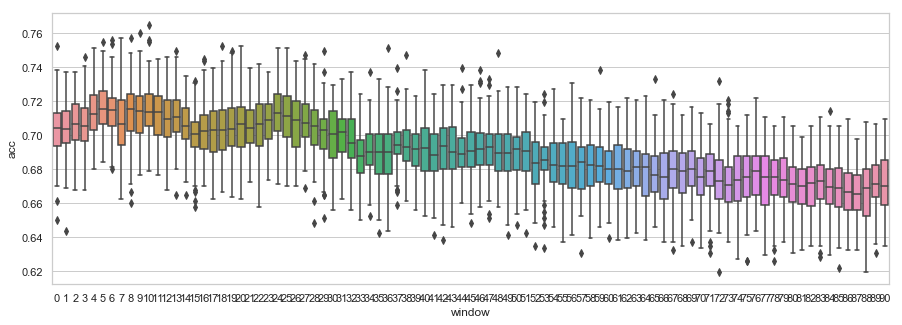

npr.org
LinregressResult(slope=-5.7706664331899956e-05, intercept=0.6231801483268037, rvalue=-0.08547107720135504, pvalue=3.1550081876848676e-16, stderr=7.052476990987162e-06)


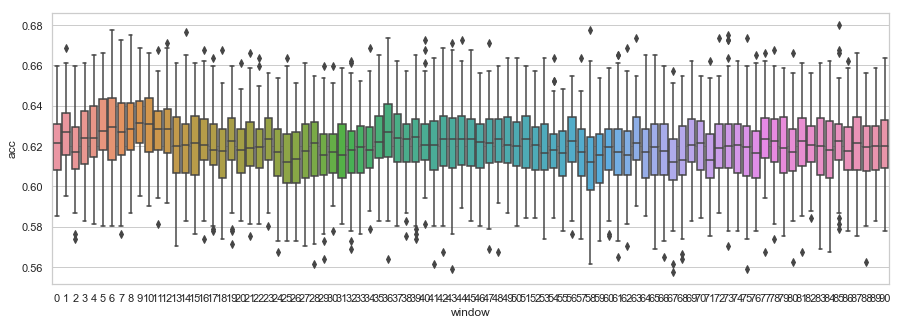

cnn.com
LinregressResult(slope=-0.00022975669853161334, intercept=0.5808300143756808, rvalue=-0.3127516818634961, pvalue=1.1736656041758654e-205, stderr=7.315494640716811e-06)


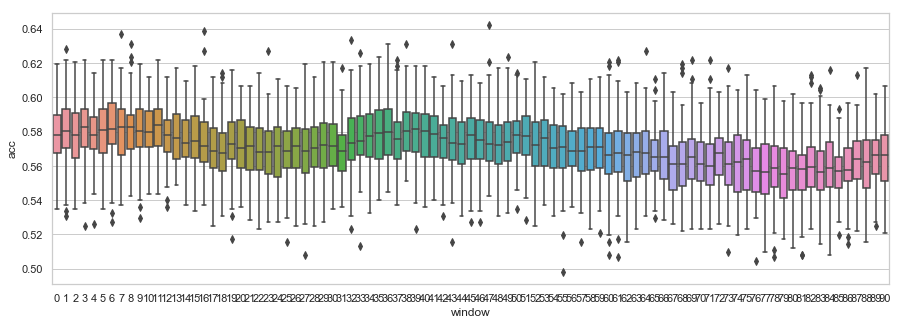

In [7]:
for d in df.domain.unique():
    
    pdf = df[df.domain==d].sort_values('window')
    
    print(d)
    print(stats.linregress(pdf.window, pdf.acc))
    
    plt.figure(figsize=(15,5))
    sns.boxplot(x='window', y='acc', data=pdf)
    plt.show()